# Application of Artificial Neural Network Classification Algorithm for Breast Cancer Diagnosis.


In [ ]:
# Importing basic packages required for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

#### Data Exploration and Preprocessing

In [ ]:
# Read and import Breast cancer dataset into file

raw_data = pd.read_csv("breast-cancer-wisconsin.data", header=None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Rename and assign correct column headers to dataset#

raw_data.rename(
    columns= {
        0: 'Sample',
        1: 'Clump Thickness',
        2: 'Uniformity of Cell Size',
        3: 'Uniformity of Cell Shape ',
        4: 'Marginal Adhesion',
        5: 'Single Epithelial Cell Size',
        6: 'Bare Nuclei',
        7: 'Bland Chromatin',
        8: 'Normal Nucleoli',
        9: 'Mitoses',
        10: 'Class'
    },
    inplace = True
)

In [ ]:
raw_data.head()

,Sample,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample                       699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
# Convert Class column values into binary digits by replacing 2 with 0 and 4 with 1.

raw_data['Class'] = raw_data['Class'].replace(2,0)
raw_data['Class'] = raw_data['Class'].replace(4,1)

raw_data.head()

,Sample,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [ ]:
# Check for irregularities in Bare Nuclei column
raw_data["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
# Remove all records with unknown Bare Nuclei values from the dataset

raw_data = raw_data[raw_data["Bare Nuclei"] != '?']
raw_data["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
raw_data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [ ]:
# Assign dependent variable and independent variables

X = raw_data.iloc[:,1:10]
Y = raw_data.iloc[:, 10]

In [ ]:
#Spliting dataset into test and train datasets. 30% of the dataset taken as the test dataset.

from sklearn.model_selection import train_test_split

#Stratify parameter "stratify=Y" makes sure we have the same proportion of classes in the train and test datasets as the inut dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify=Y, random_state=0)



#### Building Neural Networks

In [ ]:
# Standardize independent variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.14633655, -0.70965177, -0.75372989, ..., -0.58404402,
        -0.59800307, -0.35225685],
       [-1.2061679 , -0.70965177, -0.75372989, ...,  0.62975182,
        -0.59800307, -0.35225685],
       [ 1.97332617,  2.2118046 ,  2.27103315, ...,  1.84354765,
        -0.59800307,  1.9464295 ],
       ...,
       [-0.85289079, -0.70965177, -0.75372989, ..., -0.58404402,
        -0.59800307, -0.35225685],
       [-1.2061679 , -0.70965177, -0.75372989, ..., -0.17944541,
        -0.59800307, -0.35225685],
       [ 1.97332617,  2.2118046 ,  2.27103315, ...,  1.84354765,
        -0.59800307, -0.35225685]])

In [ ]:
#Build and Train the Neural Network with Keras

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6,activation='relu',input_shape=(9,))) 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#Compile the model

model.compile(optimizer = "adam", 
              loss = "binary_crossentropy",
              metrics = 'accuracy'
            ) 
# Optimizer how fast the network ‘learns’ – i.e., how quickly it updates the weights in the network. 
#If it’s too sensitive, it will update the weights too much based on the current training examples, 
#meaning the values jump around and it doesn’t converge. If it’s not sensitive enough, it will take 
#much longer to train. A common optimizer is Adam.

# Loss loss is a function which is used to calculate how big the error is in the 
#neural network’s predictions. When it is being trained, the weights in the neural 
#network are updated to try and minimize the loss. Categorical cross entropy is 
#typically the loss function we use for classification.



In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 60        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train Neural Network Model with Batch size 10 and Epoch 21

class_weights = {0:1, 1:1.85} 

res = model.fit(X_train, Y_train, 
                batch_size = 10,
                epochs= 21, 
                verbose=2, 
                validation_split=0.2,
                class_weight=class_weights,
              )



Epoch 1/21
39/39 - 1s - loss: 0.9482 - accuracy: 0.4764 - val_loss: 0.6793 - val_accuracy: 0.5938 - 1s/epoch - 35ms/step
Epoch 2/21
39/39 - 0s - loss: 0.8512 - accuracy: 0.5733 - val_loss: 0.5851 - val_accuracy: 0.9062 - 125ms/epoch - 3ms/step
Epoch 3/21
39/39 - 0s - loss: 0.7431 - accuracy: 0.6518 - val_loss: 0.5149 - val_accuracy: 0.9271 - 127ms/epoch - 3ms/step
Epoch 4/21
39/39 - 0s - loss: 0.6743 - accuracy: 0.7094 - val_loss: 0.4515 - val_accuracy: 0.9271 - 125ms/epoch - 3ms/step
Epoch 5/21
39/39 - 0s - loss: 0.6418 - accuracy: 0.7251 - val_loss: 0.4000 - val_accuracy: 0.9688 - 119ms/epoch - 3ms/step
Epoch 6/21
39/39 - 0s - loss: 0.5909 - accuracy: 0.7199 - val_loss: 0.3594 - val_accuracy: 0.9583 - 129ms/epoch - 3ms/step
Epoch 7/21
39/39 - 0s - loss: 0.5370 - accuracy: 0.7801 - val_loss: 0.3257 - val_accuracy: 0.9583 - 171ms/epoch - 4ms/step
Epoch 8/21
39/39 - 0s - loss: 0.4952 - accuracy: 0.8089 - val_loss: 0.2952 - val_accuracy: 0.9583 - 124ms/epoch - 3ms/step
Epoch 9/21
39/39 -

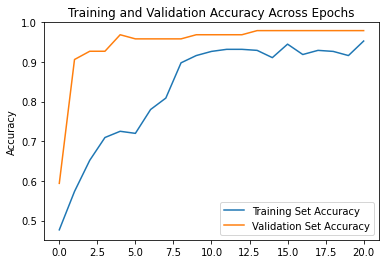

In [ ]:
# Display Training and Validation Accuracy 

acc = res.history['accuracy'] 
validation_acc = res.history['val_accuracy'] 
plt.plot(acc, label='Training Set Accuracy') 
plt.plot(validation_acc, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()
plt.show()

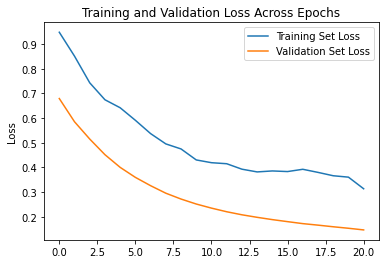

In [ ]:
# Display Training and Validation Loss

loss = res.history['loss'] 
validation_loss = res.history['val_loss'] 
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Loss Across Epochs') 
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Predict value for test datasets

Y_predicted = model.predict(X_test) 
Y_predicted = (Y_predicted > 0.5)


7/7 [==============================] - 0s 3ms/step


In [ ]:
# Display classification report of trained ANN model

print(classification_report(Y_test,Y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.96      0.97      0.97        72

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



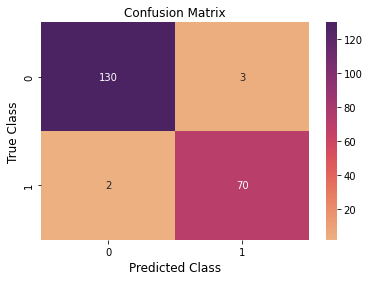

In [ ]:
# Display Confusion Matrix for ANN Algorithm Model

plt.figure(figsize=(8,8))
confusion_matrix = confusion_matrix(Y_test,Y_predicted) 
ax = sns.heatmap(confusion_matrix, cmap='crest',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix for Neural Networks trained Model",fontsize=12) 
plt.show()